In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

In [116]:
d_center = pd.read_csv("DATA_MODIS/POA_Day_CityCenter.csv", na_values=['null'])
d_rubem = pd.read_csv("DATA_MODIS/POA_Day_Rubem.csv", na_values=['null'])
n_center = pd.read_csv("DATA_MODIS/POA_Night_CityCenter.csv", na_values=['null'])
n_rubem = pd.read_csv("DATA_MODIS/POA_Night_Rubem.csv", na_values=['null'])
n_center.head()

,Unnamed: 0,time,datetime,LST_Night_1km
0,1,1609545600000,2021-01-02,23.51
1,2,1609632000000,2021-01-03,20.65
2,3,1609718400000,2021-01-04,23.83
3,7,1610064000000,2021-01-08,25.17
4,8,1610150400000,2021-01-09,25.91


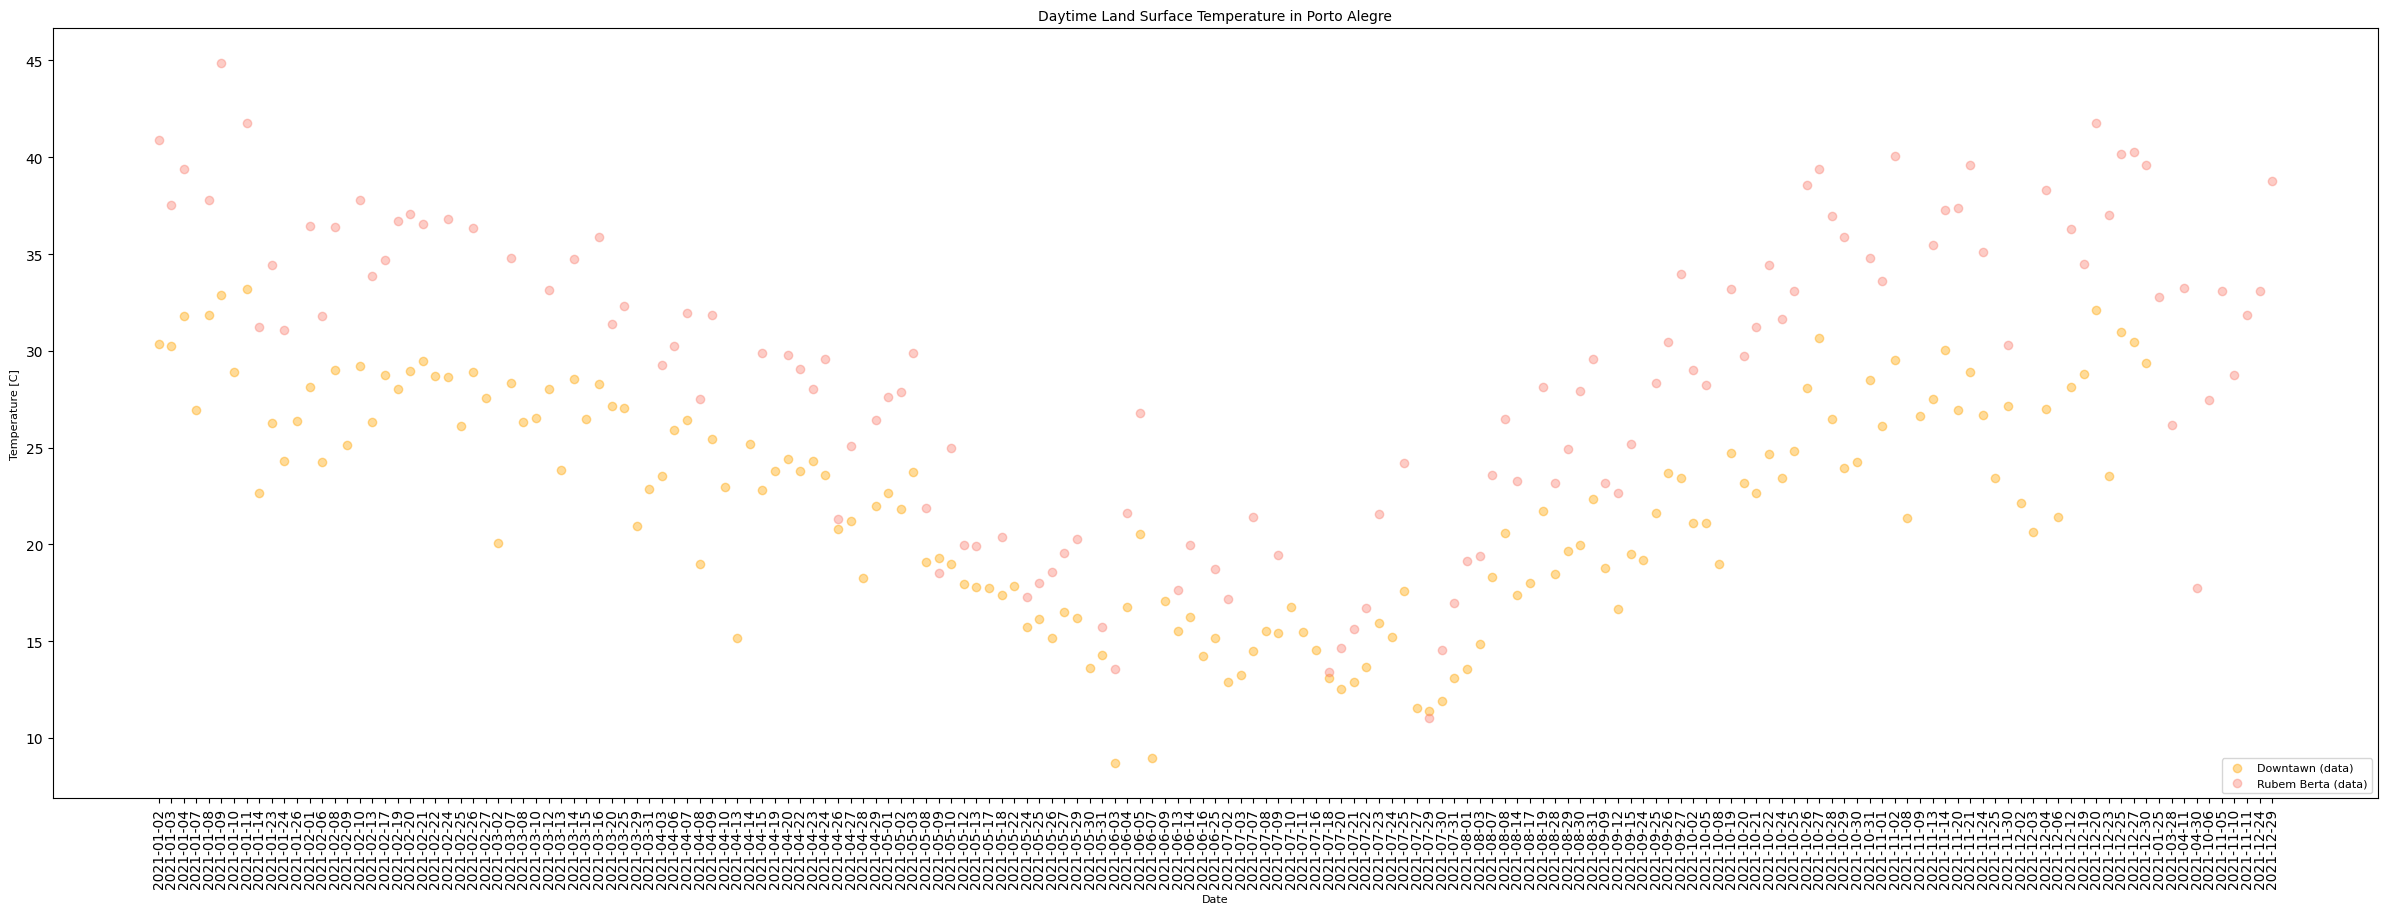

In [117]:
# Add scatter plots. #Achei esse grafico melhor que o meu, dos pontos distribuidos, vou puxar o tamanho da figura
plt.figure(figsize=(30,10))
plt.scatter(d_center['datetime'], d_center['LST_Day_1km'], c='orange', alpha=0.4, label='Downtawn (data)')
plt.scatter(d_rubem['datetime'], d_rubem['LST_Day_1km'], c='salmon', alpha=0.4, label='Rubem Berta (data)')

# Add some parameters.
plt.title('Daytime Land Surface Temperature in Porto Alegre', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.xticks(rotation=90)
plt.ylabel('Temperature [C]', fontsize=8)
plt.grid(False)
plt.legend(fontsize=8, loc='lower right')

plt.show()

In [118]:
print(d_center['time'])

0      1609545600000
1      1609632000000
2      1609718400000
3      1609977600000
4      1610064000000
           ...      
154    1639958400000
155    1640217600000
156    1640390400000
157    1640563200000
158    1640822400000
Name: time, Length: 159, dtype: int64


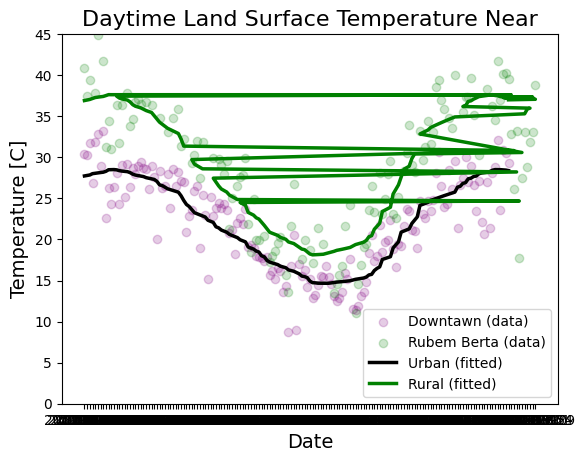

In [151]:

# Fitting curves.
## First, extract x values (times) from the dfs.
d_center_x = np.asanyarray(d_center['time'].apply(float))  # urban
d_rubem_x = np.asanyarray(d_rubem['time'].apply(float)) # rural

## Secondly, extract y values (LST) from the dfs.
d_center_y = np.asanyarray(d_center['LST_Day_1km'].apply(float))  # urban
d_rubem_y = np.asanyarray(d_rubem['LST_Day_1km'].apply(float))  # rural


## Then, define the fitting function with parameters.
def fit_func(t, lst0, delta_lst, tau, phi):
    return lst0 + (delta_lst/2)*np.sin(2*np.pi*t/tau + phi)


## Optimize the parameters using a good start p0.
lst0 = 20
delta_lst = 40
tau = 365*24*3600*1000   # milliseconds in a year
phi = 2*np.pi*4*30.5*3600*1000/tau  # offset regarding when we expect LST(t)=LST0

params_u, params_covariance_u = optimize.curve_fit(
    fit_func, d_center_x, d_center_y, p0=[lst0, delta_lst, tau, phi])
params_r, params_covariance_r = optimize.curve_fit(
    fit_func, d_rubem_x, d_rubem_y, p0=[lst0, delta_lst, tau, phi])

# Add scatter plots.
plt.scatter(d_center['datetime'], d_center['LST_Day_1km'],
           c='purple', alpha=0.2, label='Downtawn (data)')
plt.scatter(d_rubem['datetime'], d_rubem['LST_Day_1km'],
           c='green', alpha=0.2, label='Rubem Berta (data)')

# Add fitting curves.
plt.plot(d_center['datetime'],
        fit_func(d_center_x, params_u[0], params_u[1], params_u[2], params_u[3]),
        label='Urban (fitted)', color='black', lw=2.5)
plt.plot(d_rubem['datetime'],
        fit_func(d_rubem_x, params_r[0], params_r[1], params_r[2], params_r[3]),
        label='Rural (fitted)', color='green', lw=2.5)

# Add some parameters.
plt.title('Daytime Land Surface Temperature Near', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature [C]', fontsize=14)
plt.ylim(-0, 45)
plt.legend(fontsize=10, loc='lower right')

plt.show()

In [120]:
d_center

,id,time,datetime,LST_Day_1km
0,1,1609545600000,2021-01-02,30.35
1,2,1609632000000,2021-01-03,30.27
2,3,1609718400000,2021-01-04,31.79
3,6,1609977600000,2021-01-07,26.93
4,7,1610064000000,2021-01-08,31.85
...,...,...,...,...
154,353,1639958400000,2021-12-20,32.13
155,356,1640217600000,2021-12-23,23.53
156,358,1640390400000,2021-12-25,30.95
157,360,1640563200000,2021-12-27,30.47


In [121]:
d_rubem

,id,time,datetime,LST_Day_1km
0,1,1609545600000,2021-01-02,40.91
1,2,1609632000000,2021-01-03,37.51
2,3,1609718400000,2021-01-04,39.39
3,7,1610064000000,2021-01-08,37.81
4,8,1610150400000,2021-01-09,44.85
...,...,...,...,...
122,357,1640304000000,2021-12-24,33.09
123,358,1640390400000,2021-12-25,40.19
124,360,1640563200000,2021-12-27,40.25
125,362,1640736000000,2021-12-29,38.79


In [ ]:
list_center = list(d_center['time'])
isPresent = np.where(list_center == d_rubem['time'][9]) 

In [178]:
list_center = list(d_center['time'])
list_rubem = 16 

#print(d_rubem['time'][1])
#t = list_center.index(d_rubem['time'][0])
#t

differentLST = []
newTime = []
for i in range(len(d_rubem)):
#    isPresent = list_center.get(d_rubem['time'][i], -1)
    isPresent = np.where(list_center == d_rubem['time'][i]) 
    
    if len(isPresent[0]) != 0:
        newTime.append(d_rubem['time'][i])
        #print('d_rubem[time][i]')
        #print(d_rubem['time'][i])
        #print('list_center.index(d_rubem[time][i])')
        #print(list_center.index(d_rubem['time'][i]))
        #print('d_rubem[LST_Day_1km][i]')
        #print(d_rubem['LST_Day_1km'][i])
        #print('d_center[LST_Day_1km][position]')
        #print(d_center['LST_Day_1km'][position])
        position = list_center.index(d_rubem['time'][i])
        #print('d_rubem[LST_Day_1km][i]')
        #print(d_rubem['LST_Day_1km'][i])
        #print('d_center[LST_Day_1km][position]')
        #print(d_center['LST_Day_1km'][position])
        different = d_rubem['LST_Day_1km'][i] - d_center['LST_Day_1km'][position]
        if (-1)**different == -1:
            different = different * -1
            differentLST.append(different)
        else:
            differentLST.append(different)
            
        
#print(newTime)
#print(len(newTime))

test = list(pd.to_datetime(newTime, unit='ms'))
#print(test)
#print(len(test))

#print(differentLST)
#print(len(differentLST))

newDatos = [newTime, test, differentLST]
filas = ['time', 'datetime', 'LST_Day_1km']
df = pd.DataFrame(newDatos, index=filas)
df1 = df.transpose()
df1
 
#posicion = np.where(list_center == d_rubem['time'][1])   
#print(len(posicion[0]))

    
#t = list_center.get(1609545600000, -1)
#t

#t = list_rubem in list_center
#t

,time,datetime,LST_Day_1km
0,1609545600000,2021-01-02,10.56
1,1609632000000,2021-01-03,7.24
2,1609718400000,2021-01-04,7.6
3,1610064000000,2021-01-08,5.96
4,1610150400000,2021-01-09,11.98
...,...,...,...
112,1639958400000,2021-12-20,9.64
113,1640217600000,2021-12-23,13.5
114,1640390400000,2021-12-25,9.24
115,1640563200000,2021-12-27,9.78
